In [1]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
import scanpy as sc
adata_paul = sc.datasets.paul15()
adata_paul.layers['counts'] = adata_paul.X
sc.pp.log1p(adata_paul)

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


In [3]:
%%R -i adata_paul -o adata_paul
suppressPackageStartupMessages(library(destiny))
assayNames(adata_paul) <- ifelse(assayNames(adata_paul) == 'X', 'logcounts', assayNames(adata_paul))
dm <- DiffusionMap(adata_paul)
reducedDim(adata_paul, "DM") <- eigenvectors(dm)
adata_paul

class: SingleCellExperiment 
dim: 3451 2730 
metadata(1): iroot
assays(2): X counts
rownames(3451): 0610007L01Rik 0610009O20Rik ... rp9 slc43a2
rowData names(0):
colnames(2730): 0 1 ... 2728 2729
colData names(1): paul15_clusters
reducedDimNames(1): DM
spikeNames(0):
altExpNames(0):


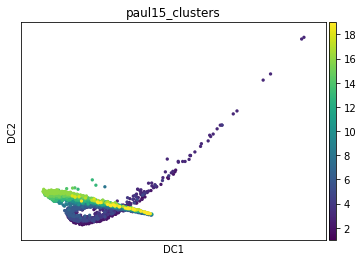

In [4]:
sc.pl.diffmap(adata_paul, color='paul15_clusters')